In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


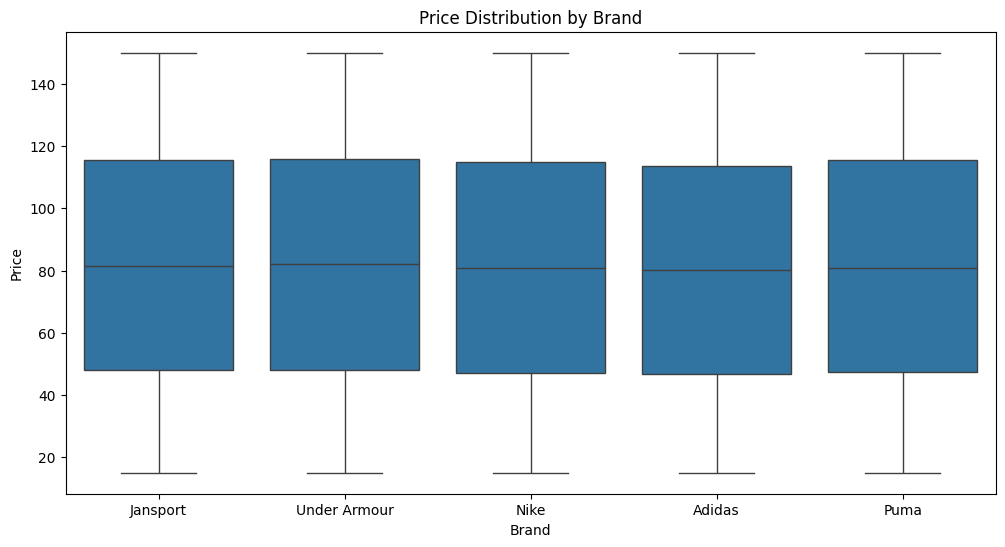

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=train)
plt.title('Price Distribution by Brand')
plt.show()

In [5]:
material_price_avg = train.groupby('Material')['Price'].mean().reset_index()
brand_price_avg = train.groupby('Brand')['Price'].mean().reset_index()

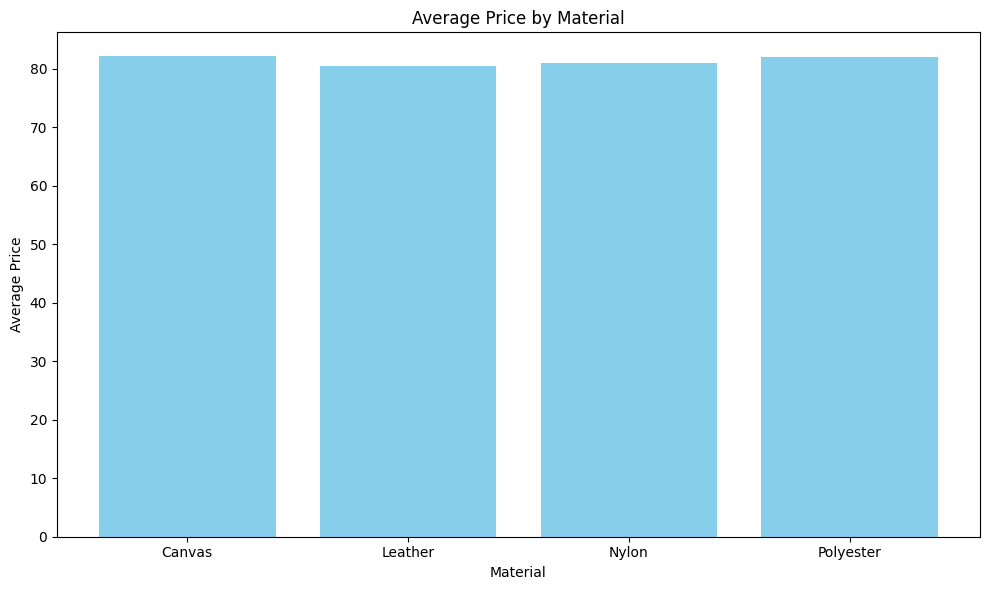

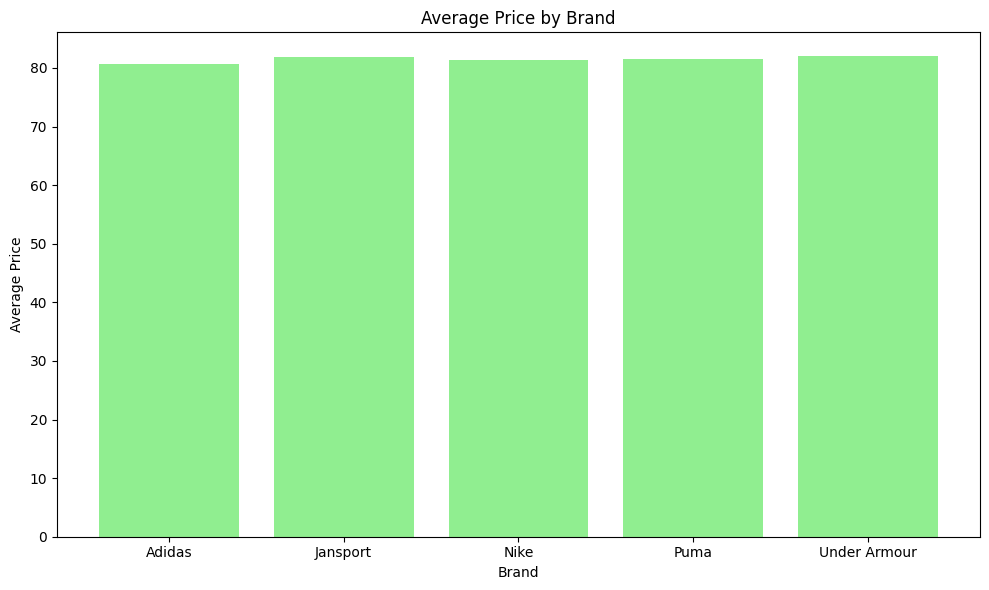

In [6]:
def plot_material_price_avg(material_price_avg):
    plt.figure(figsize=(10, 6))
    plt.bar(material_price_avg['Material'], material_price_avg['Price'], color='skyblue')

    # Adding labels and title
    plt.xlabel('Material')
    plt.ylabel('Average Price')
    plt.title('Average Price by Material')

    # Show the plot
    plt.tight_layout()
    plt.show()


def plot_brand_price_avg(brand_price_avg):
    plt.figure(figsize=(10, 6))
    plt.bar(brand_price_avg['Brand'], brand_price_avg['Price'], color='lightgreen')

    # Adding labels and title
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.title('Average Price by Brand')

    # Show the plot
    plt.tight_layout()
    plt.show()
plot_material_price_avg(material_price_avg)
plot_brand_price_avg(brand_price_avg)

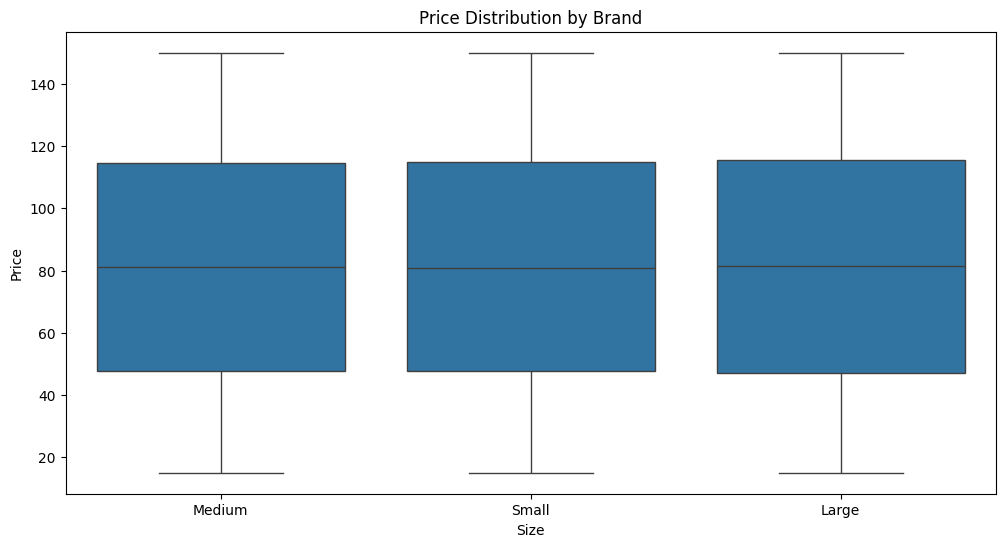

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Size', y='Price', data=train)
plt.title('Price Distribution by Brand')
plt.show()

In [8]:
# Print the NaN values
nan_values = train[train.isna().any(axis=1)]
nan_values

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
5,5,Nike,Canvas,Medium,10.0,No,Yes,NaN,Black,7.241812,20.01553
6,6,Nike,NaN,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
10,10,Nike,Polyester,Large,1.0,Yes,No,Backpack,NaN,27.806951,68.31047
11,11,Nike,Polyester,NaN,10.0,No,No,NaN,Gray,13.697554,23.25963
21,21,Under Armour,Polyester,NaN,9.0,Yes,Yes,Messenger,Gray,11.219052,35.46348
...,...,...,...,...,...,...,...,...,...,...,...
299975,299975,Jansport,Leather,Medium,8.0,No,Yes,Messenger,NaN,20.355501,110.42196
299978,299978,NaN,Canvas,Large,6.0,Yes,No,Tote,Gray,5.000000,50.78781
299983,299983,Puma,Nylon,Large,9.0,Yes,Yes,NaN,Black,25.499734,54.18523
299989,299989,Nike,NaN,NaN,2.0,Yes,Yes,Messenger,Green,NaN,30.29751


In [9]:
train_objects = train.select_dtypes(exclude='float')
train_objects['Price'] = train['Price']
train_objects.head()

,id,Brand,Material,Size,Laptop Compartment,Waterproof,Style,Color,Price
0,0,Jansport,Leather,Medium,Yes,No,Tote,Black,112.15875
1,1,Jansport,Canvas,Small,Yes,Yes,Messenger,Green,68.88056
2,2,Under Armour,Leather,Small,Yes,No,Messenger,Red,39.17320
3,3,Nike,Nylon,Small,Yes,No,Messenger,Green,80.60793
4,4,Adidas,Canvas,Medium,Yes,Yes,Messenger,Green,86.02312


In [10]:
train_nums = train.select_dtypes(exclude='object')
train_nums.head() 

,id,Compartments,Weight Capacity (kg),Price
0,0,7.0,11.611723,112.15875
1,1,10.0,27.078537,68.88056
2,2,2.0,16.643760,39.17320
3,3,8.0,12.937220,80.60793
4,4,1.0,17.749338,86.02312


In [11]:
# Basic information
print("Train shape:", train.shape)
print("\nTest shape:", test.shape)
print("\nColumns:", train.columns.tolist())
print("\nMissing values:\n", train.isnull().sum())
print("\nData types:\n", train.dtypes)

Train shape: (300000, 11)

Test shape: (200000, 10)

Columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']

Missing values:
 id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

Data types:
 id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


In [12]:
# Check percentage of missing values
missing_percentages = (train.isnull().sum() / len(train)) * 100
print("Missing value percentages:\n", missing_percentages)

# For numerical columns, we can fill with median or mean
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if train[col].isnull().any():
        train[col].fillna(train[col].median(), inplace=True)
        test[col].fillna(test[col].median(), inplace=True)

# For categorical columns, fill with mode
categorical_columns = train.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if train[col].isnull().any():
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)

Missing value percentages:
 id                      0.000000
Brand                   3.235000
Material                2.782333
Size                    2.198333
Compartments            0.000000
Laptop Compartment      2.481333
Waterproof              2.350000
Style                   2.656667
Color                   3.316667
Weight Capacity (kg)    0.046000
Price                   0.000000
dtype: float64


/tmp/ipykernel_10893/245344123.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].median(), inplace=True)
/tmp/ipykernel_10893/245344123.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [13]:
# Check percentage of missing values
missing_percentages = (train.isnull().sum() / len(train)) * 100
print("Missing value percentages:\n", missing_percentages)

Missing value percentages:
 id                      0.0
Brand                   0.0
Material                0.0
Size                    0.0
Compartments            0.0
Laptop Compartment      0.0
Waterproof              0.0
Style                   0.0
Color                   0.0
Weight Capacity (kg)    0.0
Price                   0.0
dtype: float64


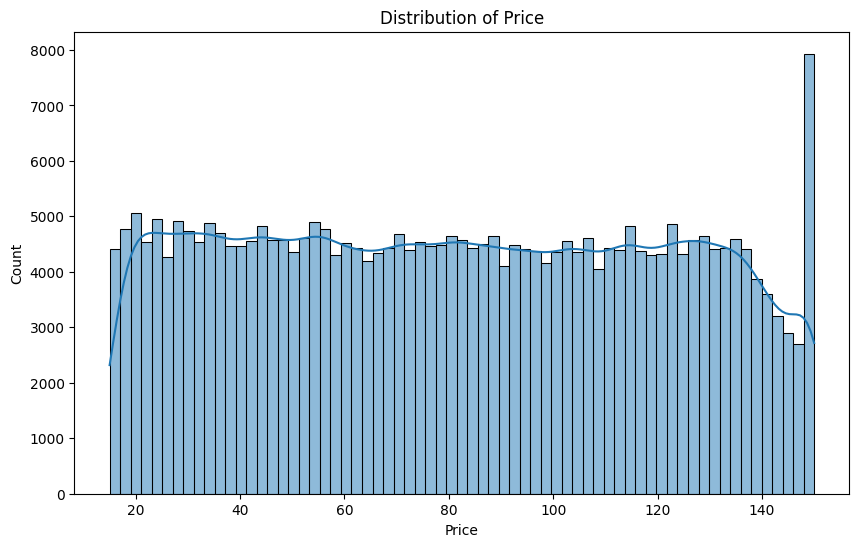

In [14]:
# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

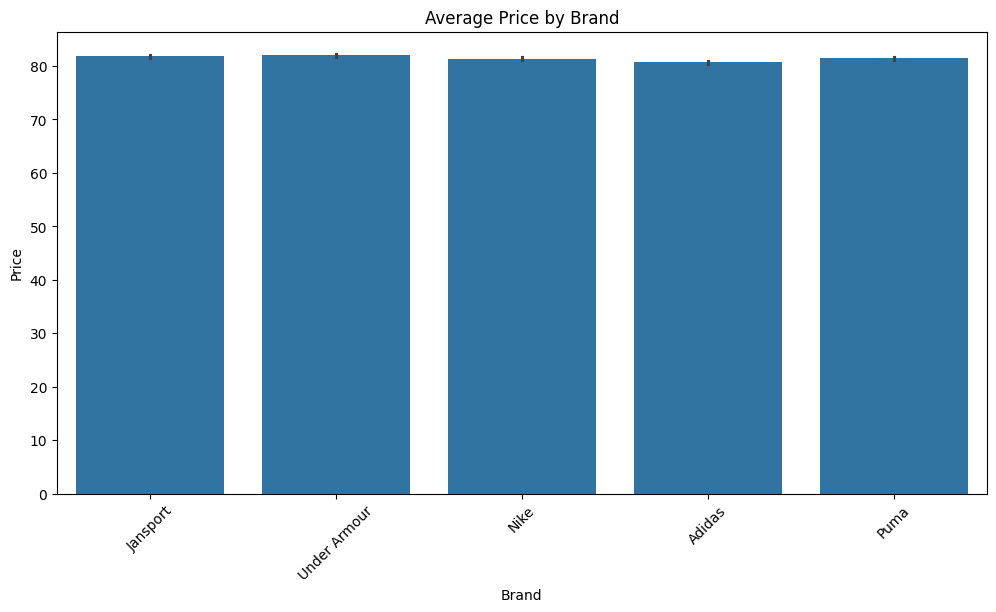

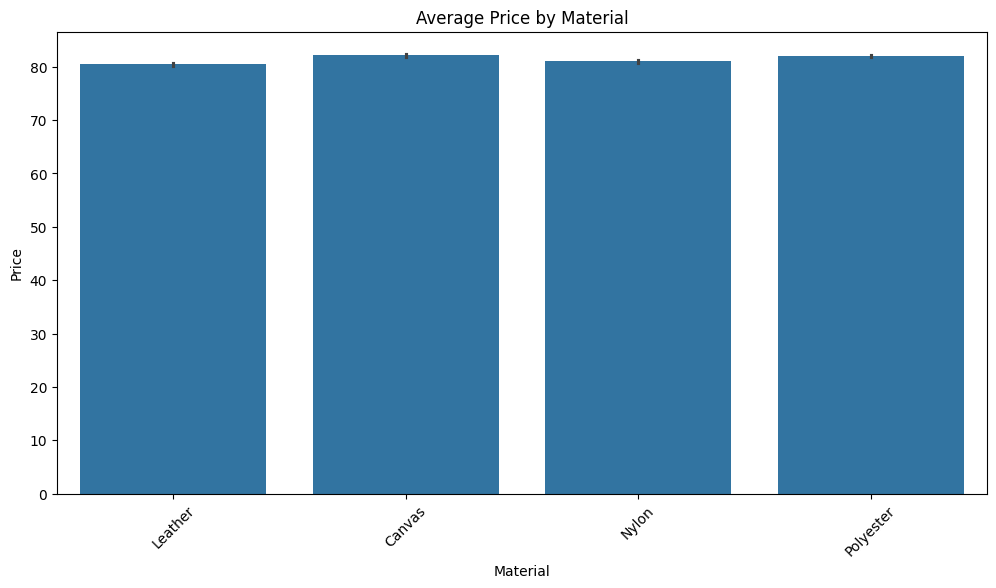

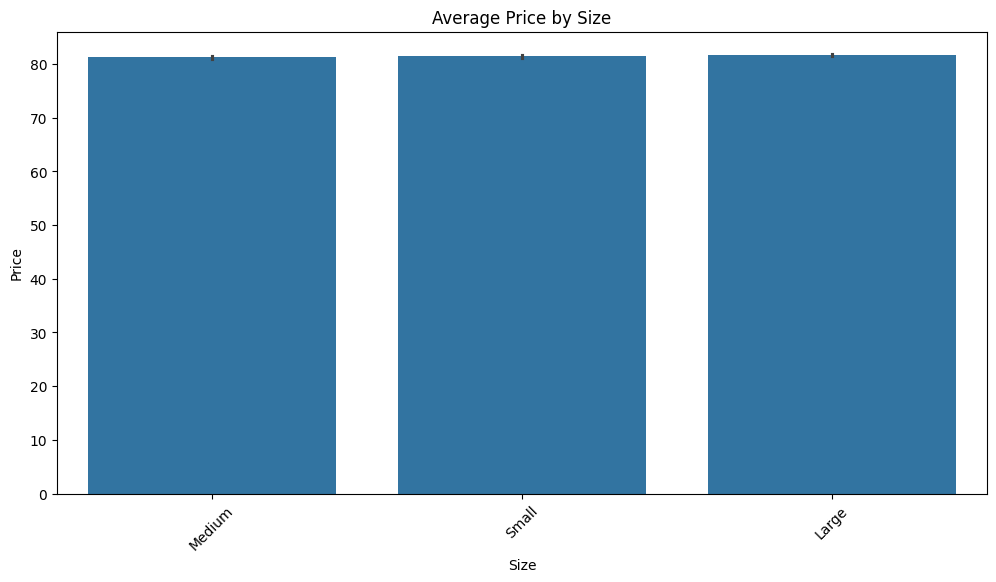

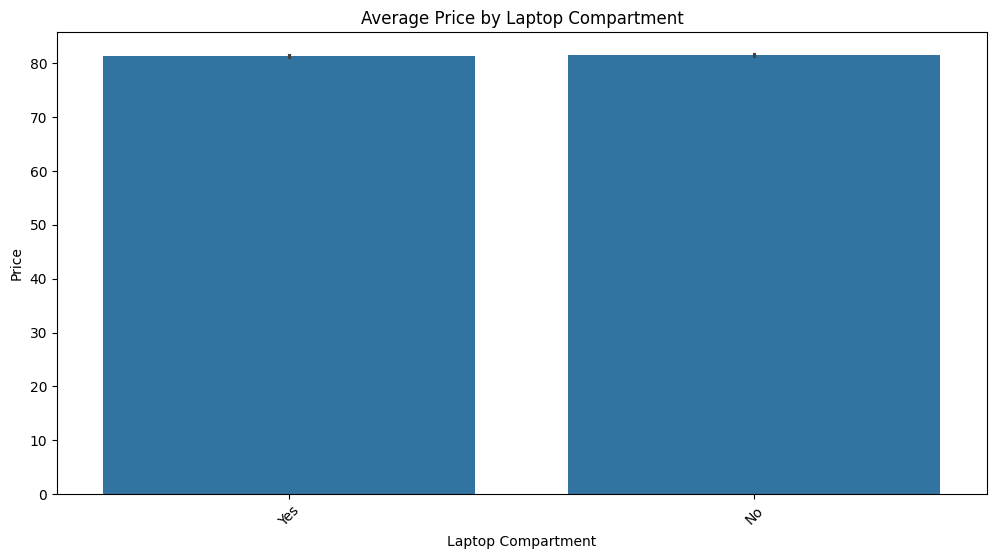

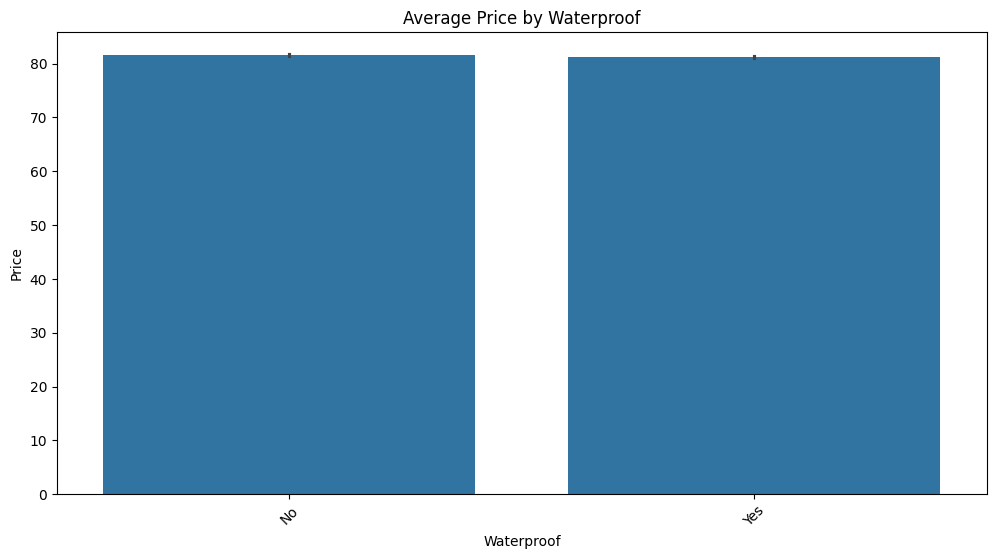

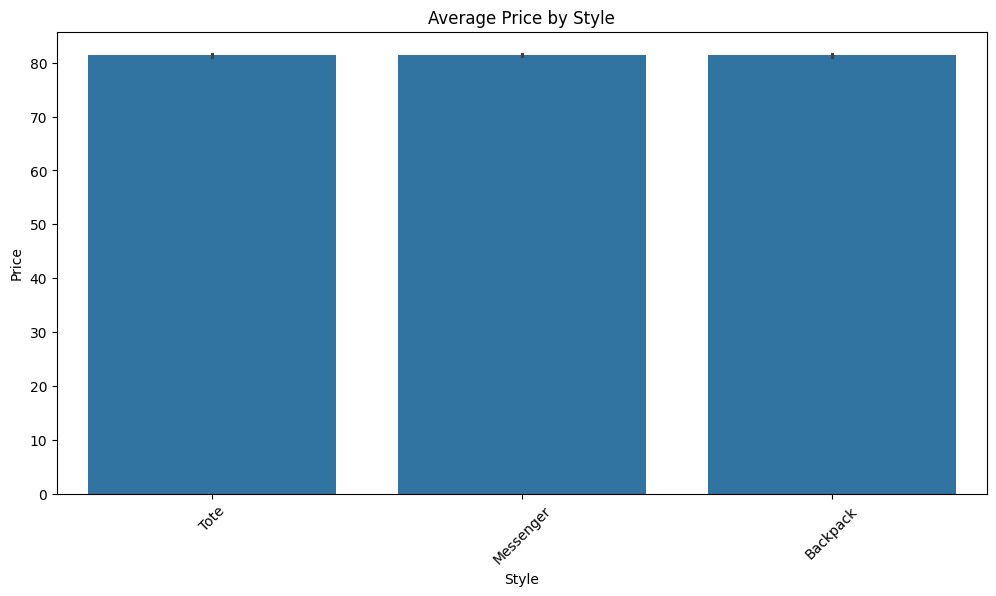

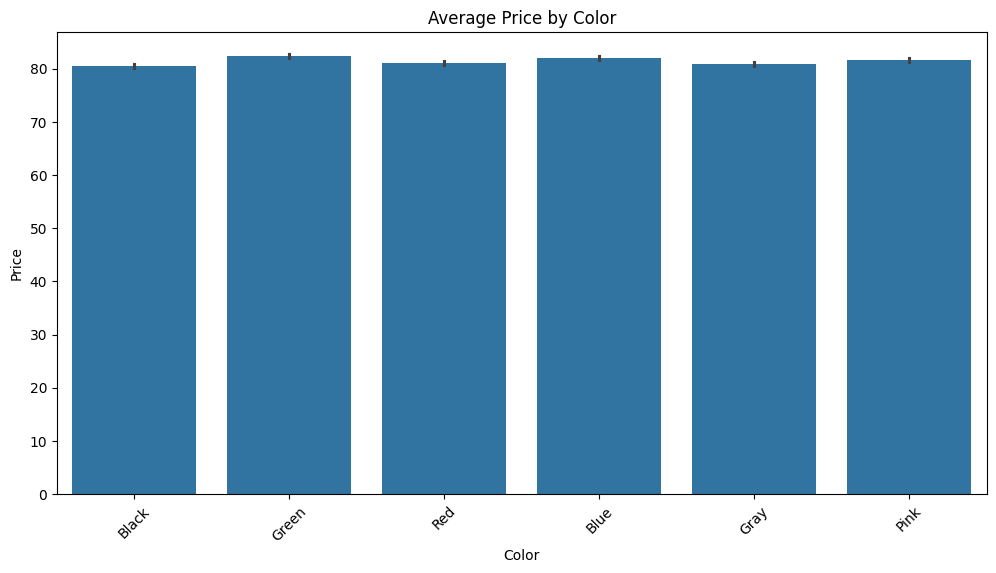

In [15]:
# Bar plots for categorical features
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=train, x=col, y='Price')
    plt.title(f'Average Price by {col}')
    plt.xticks(rotation=45)
    plt.show()

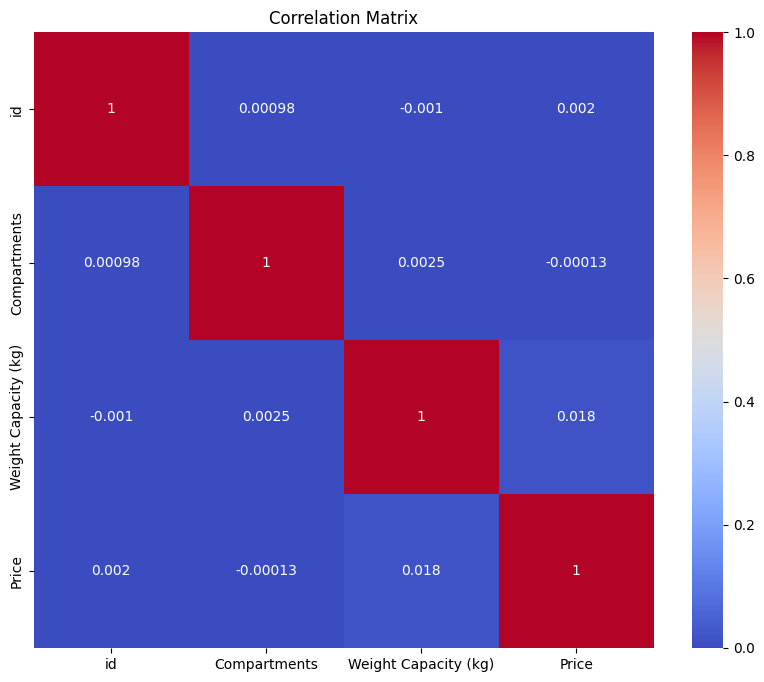

In [16]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(train.select_dtypes(include=['float64', 'int64']).corr(), 
            annot=True, 
            cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

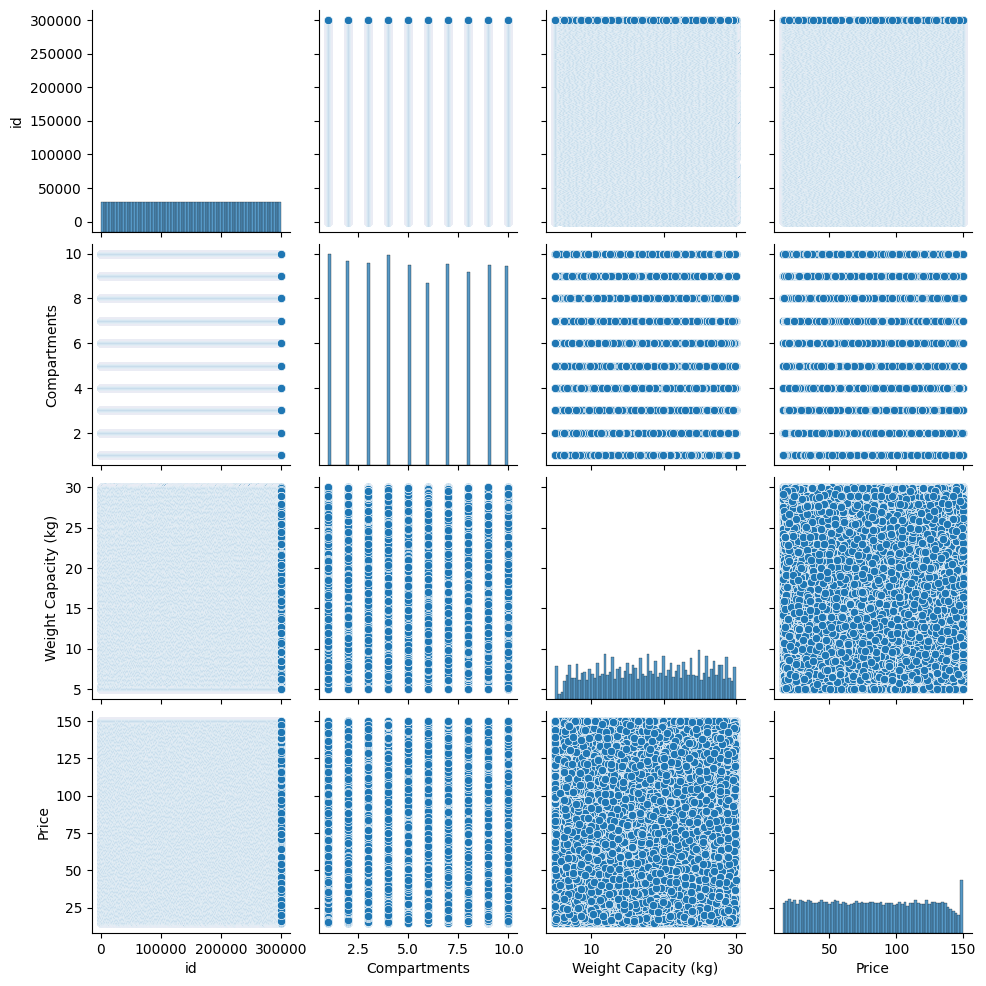

In [17]:
# Pair plot for numerical features
sns.pairplot(train[numeric_columns])
plt.show()

In [18]:
# the graph below shows not linear releation so we will use a non lineaer approach 

# Create interaction features
def create_interaction_features(train):
    # Weight per compartment
    train['weight_per_compartment'] = train['Weight Capacity (kg)'] / train['Compartments']
    
    # Square and cubic terms for non-linear relationships
    train['weight_squared'] = train['Weight Capacity (kg)']**2
    train['compartments_squared'] = train['Compartments']**2
    
    # Log transformations
    train['weight_log'] = np.log1p(train['Weight Capacity (kg)'])
    train['compartments_log'] = np.log1p(train['Compartments'])
    
    return train

# Apply to both train and test
train = create_interaction_features(train)
test = create_interaction_features(test)

train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,weight_per_compartment,weight_squared,compartments_squared,weight_log,compartments_log
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,1.658818,134.832107,49.0,2.534627,2.079442
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,2.707854,733.247143,100.0,3.335005,2.397895
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,8.321880,277.014745,4.0,2.870382,1.098612
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,1.617153,167.371669,64.0,2.634563,2.197225
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,17.749338,315.039016,1.0,2.931158,0.693147


In [19]:
# Create bins for weight capacity
def create_bins(df):
    df['weight_bins'] = pd.qcut(df['Weight Capacity (kg)'], q=5, labels=['VL', 'L', 'M', 'H', 'VH'])
    return df

train = create_bins(train)
test = create_bins(test)
train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price,weight_per_compartment,weight_squared,compartments_squared,weight_log,compartments_log,weight_bins
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875,1.658818,134.832107,49.0,2.534627,2.079442,L
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056,2.707854,733.247143,100.0,3.335005,2.397895,VH
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320,8.321880,277.014745,4.0,2.870382,1.098612,M
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793,1.617153,167.371669,64.0,2.634563,2.197225,L
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312,17.749338,315.039016,1.0,2.931158,0.693147,M


In [20]:
from sklearn.preprocessing import LabelEncoder

def encode_categories(df):
    le = LabelEncoder()
    # Seleccionamos todas las columnas categóricas
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        # Crear una nueva columna codificada
        df[f'{col}_encoded'] = le.fit_transform(df[col])
        # Eliminar la columna original
        df.drop(columns=[col], inplace=True)
    
    return df

# Aplicar la función a los conjuntos de entrenamiento y prueba
train = encode_categories(train)
test = encode_categories(test)


In [21]:
train.head()

,id,Compartments,Weight Capacity (kg),Price,weight_per_compartment,weight_squared,compartments_squared,weight_log,compartments_log,Brand_encoded,Material_encoded,Size_encoded,Laptop Compartment_encoded,Waterproof_encoded,Style_encoded,Color_encoded,weight_bins_encoded
0,0,7.0,11.611723,112.15875,1.658818,134.832107,49.0,2.534627,2.079442,1,1,1,1,0,2,0,1
1,1,10.0,27.078537,68.88056,2.707854,733.247143,100.0,3.335005,2.397895,1,0,2,1,1,1,3,3
2,2,2.0,16.643760,39.17320,8.321880,277.014745,4.0,2.870382,1.098612,4,1,2,1,0,1,5,2
3,3,8.0,12.937220,80.60793,1.617153,167.371669,64.0,2.634563,2.197225,2,2,2,1,0,1,3,1
4,4,1.0,17.749338,86.02312,17.749338,315.039016,1.0,2.931158,0.693147,0,0,1,1,1,1,3,2


In [22]:
test.head()

,id,Compartments,Weight Capacity (kg),weight_per_compartment,weight_squared,compartments_squared,weight_log,compartments_log,Brand_encoded,Material_encoded,Size_encoded,Laptop Compartment_encoded,Waterproof_encoded,Style_encoded,Color_encoded,weight_bins_encoded
0,300000,2.0,20.671147,10.335573,427.296302,4.0,3.075982,1.098612,3,1,2,0,0,2,3,0
1,300001,7.0,13.564105,1.937729,183.984933,49.0,2.678560,2.079442,2,0,1,0,1,0,3,1
2,300002,9.0,11.809799,1.312200,139.471354,81.0,2.550210,2.302585,0,0,0,0,1,1,1,1
3,300003,1.0,18.477036,18.477036,341.400863,1.0,2.969236,0.693147,0,2,0,1,0,1,3,2
4,300004,2.0,9.907953,4.953977,98.167533,4.0,2.389492,1.098612,0,2,0,1,1,2,0,4


In [23]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# XGBoost
def train_xgboost(X, y):
    xgb_model = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'XGBoost RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})')
    
    return xgb_model

# LightGBM
def train_lightgbm(X, y):
    lgb_model = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    scores = cross_val_score(lgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'LightGBM RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})')
    
    return lgb_model

In [24]:
from sklearn.ensemble import StackingRegressor

def create_stacking_model(X, y):
    # Define base models
    estimators = [
        ('xgb', XGBRegressor(random_state=42)),
        ('lgb', LGBMRegressor(random_state=42)),
        ('cat', CatBoostRegressor(random_state=42, verbose=False))
    ]
    
    # Create stacking model
    stack_model = StackingRegressor(
        estimators=estimators,
        final_estimator=LGBMRegressor(random_state=42),
        cv=5
    )
    
    return stack_model

In [26]:
from sklearn.preprocessing import StandardScaler
# Prepare the data
X = train.drop(['Price', 'id'], axis=1)
y = train['Price']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train models
xgb_model = train_xgboost(X, y)

XGBoost RMSE: 39.0360 (+/- 0.1826)


In [27]:
lgb_model = train_lightgbm(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 15
[LightGBM] [Info] Start training from score 81.474972
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 15
[LightGBM] [Info] Start training from score 81.369008
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGB

In [28]:
stack_model = create_stacking_model(X, y)


In [29]:
stack_model.fit(X, y)
xgb_model.fit(X, y)
lgb_model.fit(X, y)

test = test.drop(columns='id')
# Step 2: Make predictions on the test set
y_pred_stack = stack_model.predict(test)
y_pred_xgb = xgb_model.predict(test)
y_pred_lgb = lgb_model.predict(test)
test['Price_stack'] = y_pred_stack
test['Price_xgb'] = y_pred_xgb
test['pred_lgb'] = y_pred_lgb

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 300000, number of used features: 15
[LightGBM] [Info] Start training from score 81.411107
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1090
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 15
[LightGBM] [Info] Start training from score 81.474972
[LightGBM] [Warning] Fou

In [30]:
test.head()

,Compartments,Weight Capacity (kg),weight_per_compartment,weight_squared,compartments_squared,weight_log,compartments_log,Brand_encoded,Material_encoded,Size_encoded,Laptop Compartment_encoded,Waterproof_encoded,Style_encoded,Color_encoded,weight_bins_encoded,Price_stack,Price_xgb,pred_lgb
0,2.0,20.671147,10.335573,427.296302,4.0,3.075982,1.098612,3,1,2,0,0,2,3,0,79.059266,89.544090,77.848789
1,7.0,13.564105,1.937729,183.984933,49.0,2.678560,2.079442,2,0,1,0,1,0,3,1,80.598910,81.080673,80.829685
2,9.0,11.809799,1.312200,139.471354,81.0,2.550210,2.302585,0,0,0,0,1,1,1,1,84.875706,82.101410,82.076711
3,1.0,18.477036,18.477036,341.400863,1.0,2.969236,0.693147,0,2,0,1,0,1,3,2,77.277988,79.641006,80.030120
4,2.0,9.907953,4.953977,98.167533,4.0,2.389492,1.098612,0,2,0,1,1,2,0,4,80.471958,80.471382,83.764444


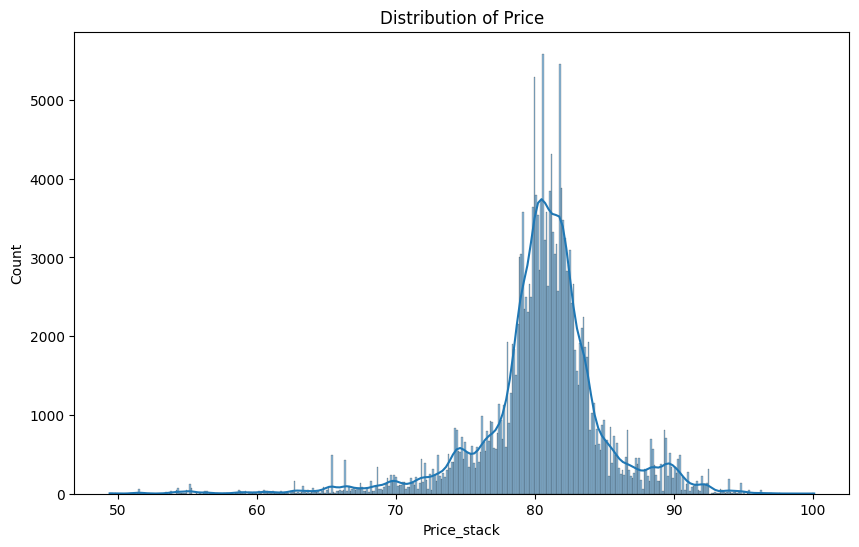

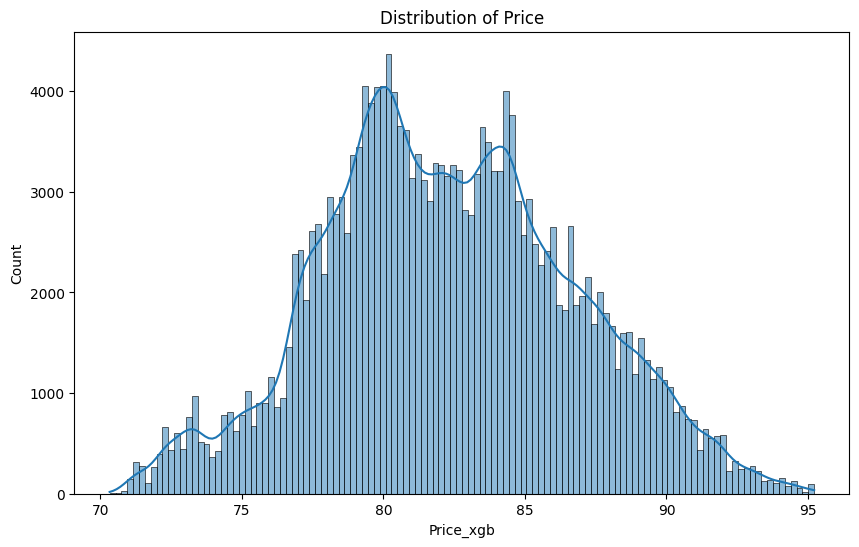

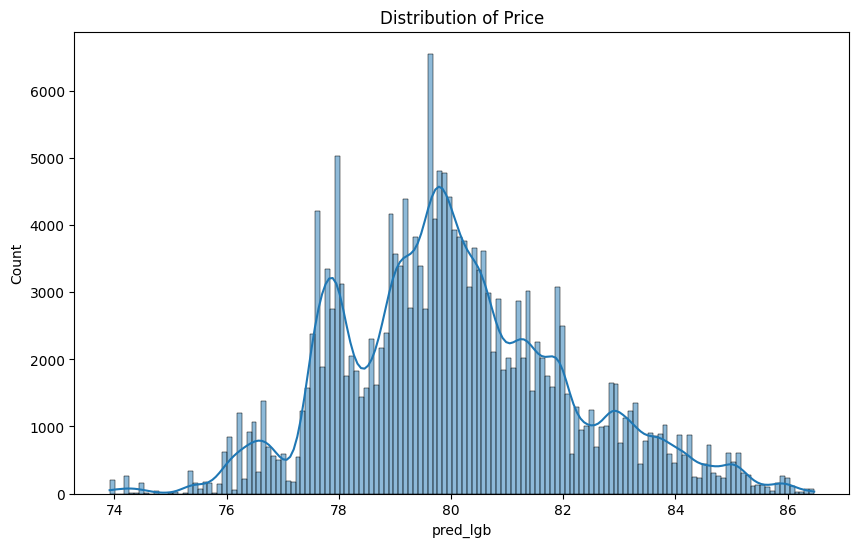

In [33]:
# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(test['Price_stack'], kde=True)
plt.title('Distribution of Price')
plt.show()
# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(test['Price_xgb'], kde=True)
plt.title('Distribution of Price')
plt.show()

# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(test['pred_lgb'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [35]:
sample = pd.read_csv('sample_submission.csv')
sample['Price'] = test['Price_xgb']
sample.head()

,id,Price
0,300000,89.544090
1,300001,81.080673
2,300002,82.101410
3,300003,79.641006
4,300004,80.471382


In [36]:
sample.to_csv('sample_submission_xgb.csv', index = False)
sample['Price'] = test['pred_lgb']
sample.to_csv('sample_submission_lgb.csv', index = False)